In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [3]:
df = pd.read_csv("Melbourne_housing_FULL.csv")

In [4]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [5]:
df.shape

(34857, 21)

In [6]:
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [7]:
fill = ['Propertycount','Distance','Bedroom2', 'Bathroom', 'Car']
df[fill] = df[fill].fillna(0) 

In [8]:
df['Landsize'] = df['Landsize'].fillna(df.Landsize.mean())

In [9]:
df['BuildingArea'] = df['BuildingArea'].fillna(df.BuildingArea.mean())

In [10]:
df.dropna(inplace=True)

In [11]:
df.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [12]:
df = pd.get_dummies(df, drop_first= True)

In [13]:
df

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
2,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,...,0,1,0,0,1,0,0,0,0,0
4,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,...,0,1,0,0,1,0,0,0,0,0
6,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,...,0,1,0,0,1,0,0,0,0,0
11,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,...,0,1,0,0,1,0,0,0,0,0
14,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,3,500000.0,25.5,3750.0,3.0,2.0,2.0,383.0,118.0,2016.0,...,0,0,0,0,1,0,0,0,0,0
34849,3,570000.0,25.5,3750.0,3.0,2.0,2.0,404.0,158.0,2012.0,...,0,0,0,0,1,0,0,0,0,0
34853,2,888000.0,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,...,0,0,0,0,0,0,0,0,1,0
34854,2,705000.0,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,...,0,0,0,0,0,0,0,0,1,0


In [14]:
x = df.drop('Price' , axis=1)
y= df['Price']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [16]:
from sklearn import svm

In [17]:
regr = svm.SVR()
regr.fit(X_train, y_train)

SVR()

In [18]:
pred = regr.predict(X_test)

In [19]:
import matplotlib.pyplot as plt

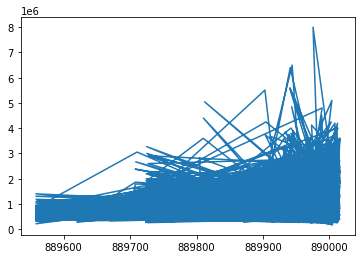

In [20]:
plt.plot(pred, y_test)

In [21]:
regr.score(X_test,y_test)

-0.07678265336311618

In [22]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train, y_train)
reg.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.617e+12, tolerance: 3.715e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.6720116664416953

In [23]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.7238451278083344